In [1]:
import numpy as np
import pandas as pd
import scipy as sc

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pymc3 as pm

In [4]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

sns.set_palette("Dark2")
sns.set_style("darkgrid")
az.style.use('arviz-darkgrid')

In [6]:
from scipy.special import logsumexp

In [16]:
data = {'species' : ['afarensis', 'africanus', 'habilis', 'boisei', 'rudolfensis', 'ergaster', 'sapiens'],
'brain' : [438, 452, 612, 521, 752, 871, 1350],
'mass' : [37., 35.5, 34.5, 41.5, 55.5, 61.0, 53.5]}
df = pd.DataFrame(data)
df

,species,brain,mass
0,afarensis,438,37.0
1,africanus,452,35.5
2,habilis,612,34.5
3,boisei,521,41.5
4,rudolfensis,752,55.5
5,ergaster,871,61.0
6,sapiens,1350,53.5


## $ R^2  = 1 - \frac{\sigma^2(residual)}{\sigma^2(target)} $

In [17]:
def r2(m):
    return 1- m.resid.var()/df.brain.var()

In [18]:
m_1 = smf.ols('brain ~ mass', data=df).fit()
m_3 = smf.ols('brain ~ mass + I(mass**2) + I(mass**3)', data=df).fit()
m_4 = smf.ols('brain ~ mass + I(mass**2) + I(mass**3) + I(mass**4)', data=df).fit()
m_5 = smf.ols('brain ~ mass + I(mass**2) + I(mass**3) + I(mass**4) + I(mass**5)', data=df).fit()
m_6 = smf.ols('brain ~ mass + I(mass**2) + I(mass**3) + I(mass**4) + I(mass**5) + I(mass**6)', data=df).fit()
m_7 = smf.ols('brain ~ mass + I(mass**2) + I(mass**3) + I(mass**4) + I(mass**5) + I(mass**6) +I(mass**7)', data=df).fit()

In [19]:
r2(m_7)

0.9928281596319113

In [23]:
m_7.rsquared

0.9928281596318554

In [37]:
m_7.llf

-32.538710156279535

```We see that just overfitting the model gives 1 as the r2 value```

# Entropy : 
### $ -E[log(p_i)] $

### $ -\sum_{\forall i}^n p_i*log(p_i)$ 

#### KL Divergence

$ \sum_i{p_i * (log(p_i)-log(q_i))} $

To compare the models, we dont really need to know the true distribution. 

Only finding out $ log(q_i) $  will suffice. This is called deviance.

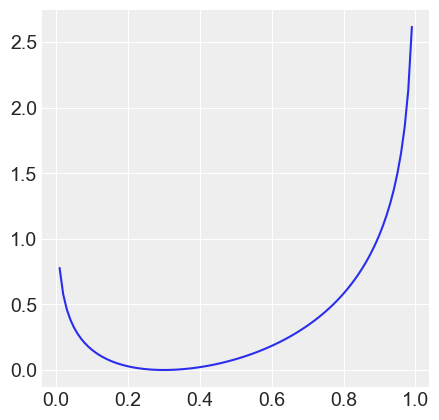

In [14]:
def kl_div(tr,mod):
    return np.sum(tr*(np.log(tr)-np.log(mod)))

plt.figure(figsize=(5,5))
p = [0.3,0.7]
k = np.arange(100)/100.0
y = [kl_div(p,[i,1-i]) for i in k]
sns.lineplot(k,y);

In [44]:
a= sc.stats.norm(loc=0,scale=1)

In [45]:
a.entropy()

array(1.41893853)

### Overfitting

```
Everybody overfits
We create our model, fit it to traning set, find out the deviance, fit the model to testing and find out the deviance.
Difference b/w two deviance is measure of overfitting.
```

In [113]:
def sim_train_test(N=20, k=3, rho=[0.15, -0.4], b_sigma=100):
    
    n_dim = 1 + len(rho)
    if n_dim < k:
        n_dim = k
    Rho = np.diag(np.ones(n_dim))
    Rho[0, 1:3:1] = rho
    i_lower = np.tril_indices(n_dim, -1)
    Rho[i_lower] = Rho.T[i_lower]
    
    x_train = sc.stats.multivariate_normal.rvs(cov=Rho, size=N)
    x_test = sc.stats.multivariate_normal.rvs(cov=Rho, size=N)
    
    mm_train = np.ones((N,1))
    
    np.concatenate([mm_train, x_train[:, 1:k]], axis=1)

In [114]:

n = 20
tries = 10
param = 6
r = np.zeros(shape=(param - 1, 4))

train = []
test = []

for j in range(2, param + 1):
    print(j)
    for i in range(1, tries + 1):
        tr, te = sim_train_test(N=n, k=param)
        train.append(tr), test.append(te)
    r[j -2, :] = np.mean(train), np.std(train, ddof=1), np.mean(test), np.std(test, ddof=1)

2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 2158.97draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1881.07draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1999.81draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1499.47draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 cha

3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1950.42draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 2158.34draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 2027.00draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 2103.10draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 cha

4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1503.56draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1388.75draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1710.78draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1570.24draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 cha

5


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1643.26draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1571.01draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1759.45draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1923.65draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 cha

6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:06<00:00, 595.72draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:20<00:00, 193.62draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:27<00:00, 144.83draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:07<00:00, 554.04draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains 

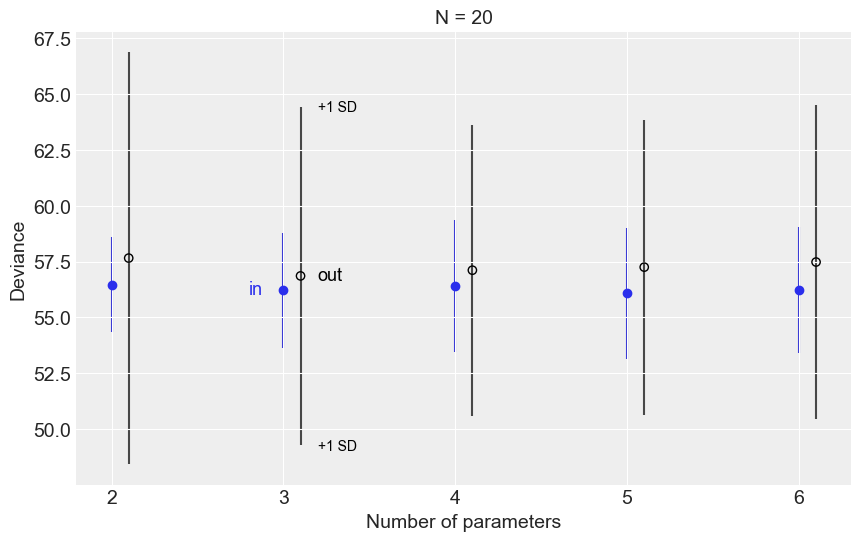

In [115]:
num_param = np.arange(2, param + 1)

plt.figure(figsize=(10, 6))
plt.scatter(num_param, r[:, 0], color='C0')
plt.xticks(num_param)

for j in range(param - 1):
    plt.vlines(num_param[j], r[j,0] - r[j, 1], r[j,0] + r[j,1], color='mediumblue', 
               zorder=-1, alpha=0.80)

plt.scatter(num_param + 0.1, r[:, 2], facecolors='none', edgecolors='k')

for j in range(param - 1):
    plt.vlines(num_param[j] + 0.1, r[j,2] - r[j, 3], r[j,2] + r[j,3], color='k', 
               zorder=-2, alpha=0.70)    

dist = 0.20
plt.text(num_param[1] - dist, r[1, 0] - dist, 'in', color='C0', fontsize=13)
plt.text(num_param[1] + dist, r[1, 2] - dist, 'out', color='k', fontsize=13)
plt.text(num_param[1] + dist, r[1, 2] + r[1,3] - dist, '+1 SD', color='k', fontsize=10)
plt.text(num_param[1] + dist, r[1, 2] - r[1,3] - dist, '+1 SD', color='k', fontsize=10)
plt.xlabel('Number of parameters', fontsize=14)
plt.ylabel('Deviance', fontsize=14)
plt.title('N = {}'.format(n), fontsize=14)
plt.show()

In [453]:
def overfitting_test(N=20,K=2,rho=[0.15, 0.4]):
    n_dim = k 
    # if n_dim < k:
    #     n_dim = k
    Rho = np.diag(np.ones(n_dim)+1)
    # Rho[0, 1:3:1] = rho
    # i_lower = np.tril_indices(n_dim, -1)
    # Rho[i_lower] = Rho.T[i_lower]

    x_train = sc.stats.multivariate_normal.rvs(mean=np.ones(n_dim),cov=Rho, size=N)
    x_test = sc.stats.multivariate_normal.rvs(mean=np.ones(n_dim),cov=Rho, size=N)
    y_train  = intercept +  np.reshape(np.matmul(x_train[:,:2],rho).T,(N,1))
    y_test  = intercept + np.reshape(np.matmul(x_test[:,:2],rho).T,(N,1))
    x_train = np.concatenate([y_train, x_train],axis=1)
    x_test = np.concatenate([y_test, x_test],axis=1)

    with pm.Model() as m_sim:
        alpha = pm.Normal('alpha',mu=1,sigma=1)
        vec_V = pm.Normal('vec_V', mu=0,  sigma = 1,
                            shape=n_dim)
        mu = pm.Deterministic('mu', alpha + pm.math.dot(x_train[:,1:], vec_V.T))
        y = pm.Normal('y', mu=mu, sd=1, observed=x_train[:, 0])

    with m_sim:
        trace_m_sim = pm.sample()

    post_vec = az.summary(trace_m_sim,var_names='vec_V')['mean']
    post_vec = np.array([i for i in post_vec]).reshape(n_dim, -1)
    post_alpha = az.summary(trace_m_sim,var_names='alpha')['mean']
    post_y_train = post_alpha.values +  np.matmul(x_train[:,1:],post_vec)

    log_probs_train = sc.stats.norm.logpdf(x_train[:,0],loc=post_y_train,scale=1)[:,0]
    deviance_train = -2*sum(log_probs_train)

    post_y_test = post_alpha.values +  np.matmul(x_test[:,1:],post_vec)
    log_probs_test = sc.stats.norm.logpdf(x_test[:,0],loc=post_y_test,scale=1)[:,0]
    deviance_test = -2*sum(log_probs_test)

    return deviance_train, deviance_test


In [465]:
N=20
train = []
test = []
for i in range(3,7):
    tup = overfitting_test(N=N,K=i)
    train.append(tup[0])
    test.append(tup[1])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1621.25draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1612.31draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1389.42draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vec_V, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1325.22draws/s]


In [466]:
train

[44.312328825706786, 44.107224392679896, 41.88693534154985, 52.10721306859281]

In [467]:
test

[55.090552164591514, 47.062213024994065, 41.81312871515308, 44.90417080598393]

### Regularization

In [542]:
predictors = sc.stats.multivariate_normal.rvs(mean=[0.4,0.6],cov=1,size=2000)
beta = [0.45,0.5]
alpha = 0.4
data = alpha + np.matmul(predictors,beta)

In [553]:
with pm.Model() as model:
    alpha = pm.Normal('alpha',1,100)
    beta = pm.Normal('beta',mu=[0.5],sd=1,shape=2)
    mu = pm.Deterministic('mu',alpha+pm.math.dot(predictors,beta))
    y = pm.Normal('y',mu=mu,sd=1,observed=data)
    trace  = pm.sample(1000,tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /Users/divay/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.7.4-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 8000/8000 [00:02<00:00, 2928.74draws/s]
